In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


# Load data
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [101]:
##Exploring Data

In [102]:
# check if there are missing values
print(df.isnull().sum(), end='\n\n')


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64



In [103]:
# check if there are non-numerical features
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [104]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [105]:
# replace all NA's with 0
df.fillna(0).head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


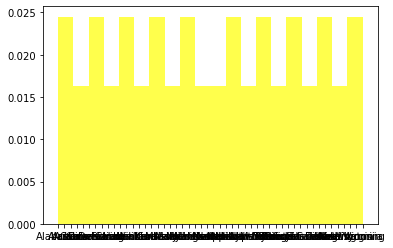

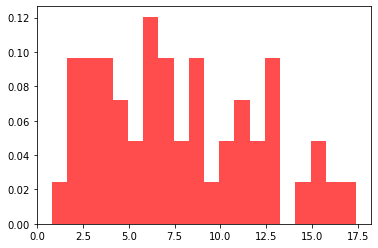

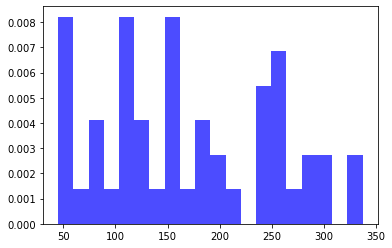

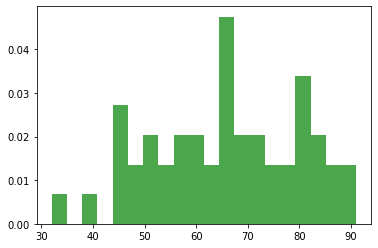

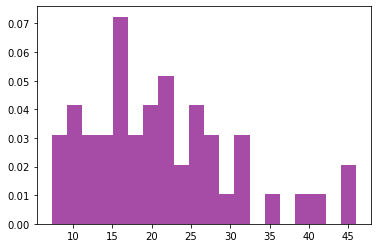

In [106]:
plt.hist(df['City'], 20, density =1,facecolor="yellow", alpha=0.7)
plt.show()

plt.hist(df['Murder'], 20, density =1,facecolor="Red", alpha=0.7)
plt.show()

plt.hist(df['Assault'], 20, density =1,facecolor="Blue", alpha=0.7)
plt.show()

plt.hist(df['UrbanPop'], 20, density =1,facecolor="Green", alpha=0.7)
plt.show()

plt.hist(df['Rape'], 20, density =1,facecolor="Purple", alpha=0.7)
plt.show()


In [107]:
# Create toy data
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=0,
                           random_state=123, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [108]:
# Create base model
base = DecisionTreeClassifier(max_depth=5)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=100, random_state=7)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.9366666666666666
Accuracy ensemble: 0.96


In [109]:
#IMPORTANT SCORES
##Random Forest ensemble method let you print importance scores for features in the dataset.

In [110]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.370725
1    0.243625
2    0.128087
3    0.102797
4    0.059095
7    0.022082
6    0.018867
8    0.018603
9    0.018286
5    0.017834
dtype: float64

In [111]:
#This removal of noise tends to improve performance and reduce training time.

In [112]:
# select important features
X = X[:, :10]

# retrain 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.9433333333333334
Accuracy ensemble: 0.9733333333333334


In [113]:
#Checking the positivity and Negativity and the columns.

In [114]:
positive = df.Rape[df['Rape'] > 0].count()
negative = df.Rape[df['Rape'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive = df.Murder[df['Murder'] > 0].count()
negative = df.Murder[df['Murder'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive = df.UrbanPop[df['UrbanPop'] > 0].count()
negative = df.UrbanPop[df['UrbanPop'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive = df.Assault[df['Assault'] > 0].count()
negative = df.Assault[df['Assault'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)


positive =  50 negative =  0
positive =  50 negative =  0
positive =  50 negative =  0
positive =  50 negative =  0


In [121]:
X = df[['UrbanPop','Rape']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

K=5

Data size:
(50, 2)


In [122]:
###Clustering

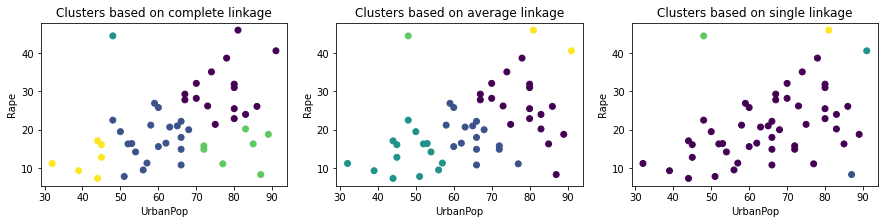

In [123]:
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=l)
  cluster.fit_predict(X)

  ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('UrbanPop')
  plt.ylabel('Rape')
 
L = 'complete'

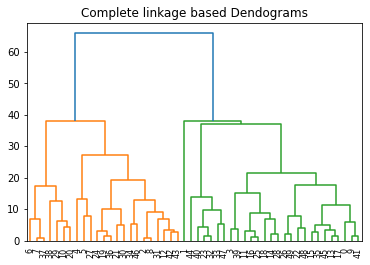

In [124]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='complete'))  

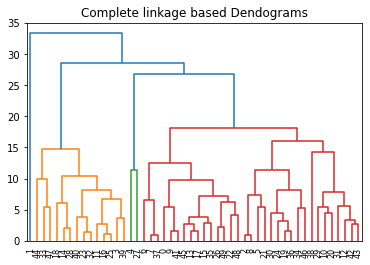

In [125]:
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(X, method='average'))  

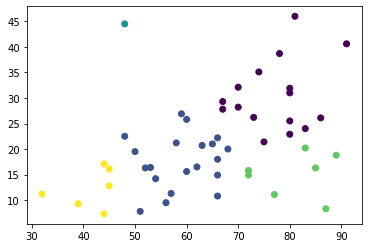

In [126]:
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=L)
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

In [ ]:
#Interpretation
#The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. The customers at top right have high salaries and spend a lot. These are the type of customers that companies target. Both groups have a long tail, showing the presence of a small group of very high-income shoppers.

#The customers in the middle are the ones with average income and average spending. The density of this clusters shows that this cluster contains the most companies. For this reason, companies also target these customers.

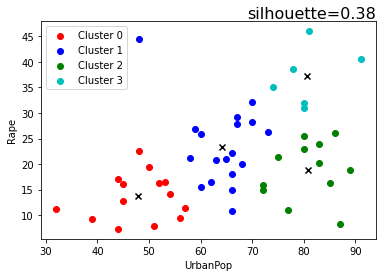

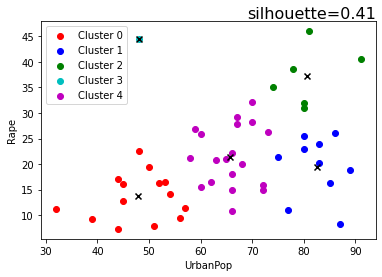

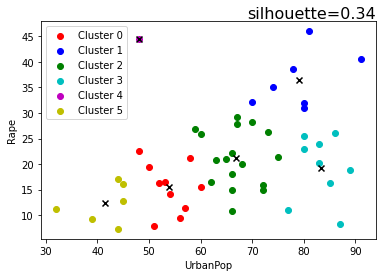

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('UrbanPop')
    plt.ylabel('Rape')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)

C:\Users\korina Mokati\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


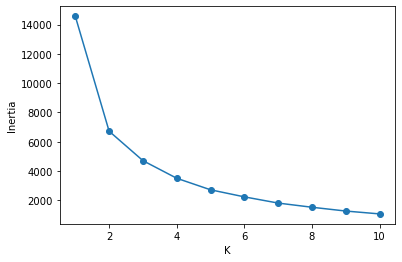

In [128]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)


In [ ]:
#The elbow runs from k=3 to k=5. In cases like this, it is not always clear which value within the elbow is the most optimal, so we can investigate likely candidates further using the silhouette score.

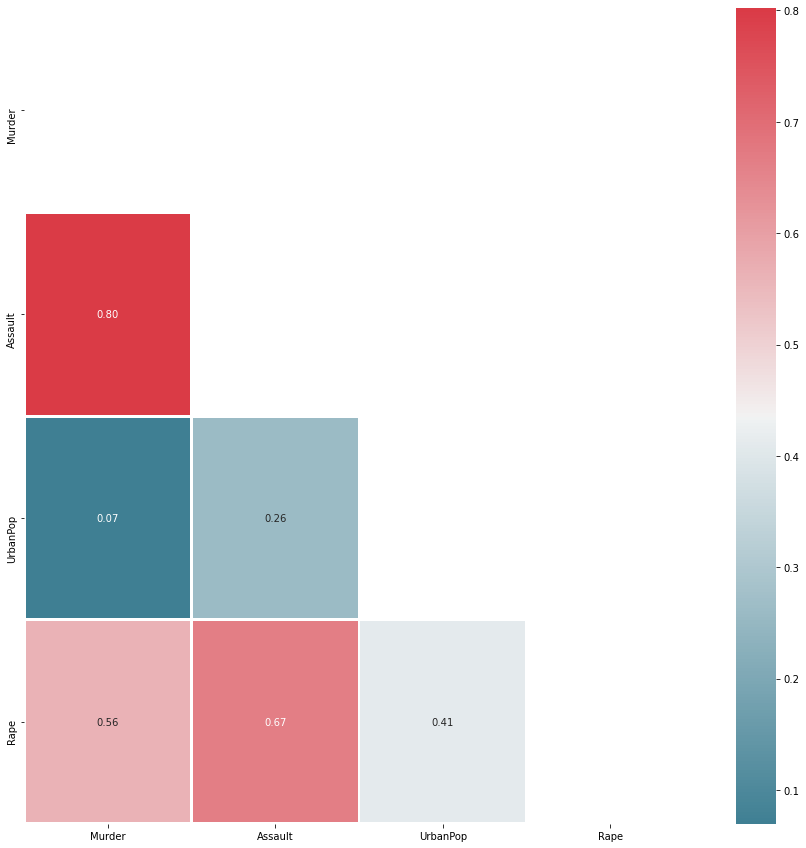

In [130]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In [132]:
# drop Assault column
df = df.drop(columns=['City'])
df = df.set_index('Assault')
df.head()

,Murder,UrbanPop,Rape
Assault,,,
236,13.2,58,21.2
263,10.0,48,44.5
294,8.1,80,31.0
190,8.8,50,19.5
276,9.0,91,40.6


In [133]:
# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2
Assault,,,
236,0.484428,1.162276,-0.516539
263,1.483964,1.369096,1.995536
294,1.214436,-0.741392,0.329907
190,-0.473865,1.009405,0.150527
276,2.387772,-1.207947,0.662206
